In [1]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [0]:
import numpy as np
import keras
#from keras.datasets import mnist
from keras.models import Sequential
####### several types of layers in CNN ###############
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
######################################################
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit

import warnings
warnings.filterwarnings('ignore')

In [3]:
batch_size = 200
num_classes = 10
epochs = 20
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
#################################################
model = Sequential()
model.add(Conv2D(2, kernel_size=(3, 3), activation='sigmoid',strides=1,padding='valid',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(2, kernel_size=(3, 3), activation='relu',strides=1,padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
################ FULLY CONNECTED ############################
model.add(Flatten())
model.add(Dense(50, activation='tanh'))
############################################################
model.add(Dense(num_classes, activation='softmax'))
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 2)         20        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 2)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 2)         38        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 2)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)           

In [5]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 15s 257us/step - loss: 1.6603 - acc: 0.4256 - val_loss: 0.9769 - val_acc: 0.6343
Epoch 2/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.8540 - acc: 0.6720 - val_loss: 0.8191 - val_acc: 0.6792
Epoch 3/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.7579 - acc: 0.7093 - val_loss: 0.7509 - val_acc: 0.7138
Epoch 4/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.7136 - acc: 0.7267 - val_loss: 0.7305 - val_acc: 0.7267
Epoch 5/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.6864 - acc: 0.7382 - val_loss: 0.7283 - val_acc: 0.7135
Epoch 6/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.6646 - acc: 0.7483 - val_loss: 0.6770 - val_acc: 0.7462
Epoch 7/20
60000/60000

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


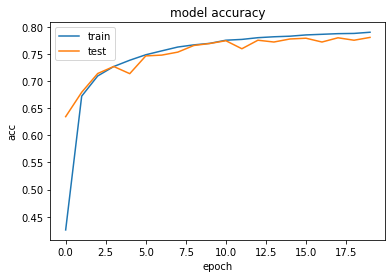

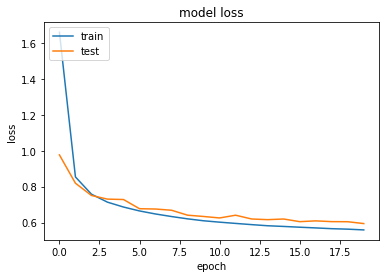

In [9]:
# list all data in history
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
y_pred=model.predict(x_test)

In [0]:
y_pred = (y_pred > 0.5) 

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1000
           1       0.93      0.88      0.91      1000
           2       0.73      0.47      0.57      1000
           3       0.85      0.73      0.78      1000
           4       0.66      0.65      0.65      1000
           5       0.90      0.90      0.90      1000
           6       0.54      0.16      0.25      1000
           7       0.90      0.85      0.87      1000
           8       0.94      0.92      0.93      1000
           9       0.92      0.94      0.93      1000

   micro avg       0.84      0.72      0.78     10000
   macro avg       0.82      0.72      0.76     10000
weighted avg       0.82      0.72      0.76     10000
 samples avg       0.72      0.72      0.72     10000



In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
clf_cfm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Confusion matrix:")
print(clf_cfm, end='\n\n')

Confusion matrix:
[[891   5  20  20  10   1  40   0  13   0]
 [ 59 880   4  49   6   0   0   0   2   0]
 [331   2 473   5 137   0  41   0  11   0]
 [170  36  20 727  32   1  11   0   2   1]
 [232   8  45  24 646   0  38   0   7   0]
 [ 16   0   0   1   0 897   0  61   4  21]
 [560  11  82  24 144   2 161   0  16   0]
 [ 16   0   0   0   0  68   0 851   0  65]
 [ 45   0   8   5   8  12   5   2 915   0]
 [ 14   0   0   0   0  12   0  36   0 938]]



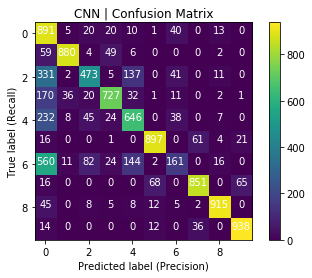

In [14]:
import matplotlib.pyplot as plt
import itertools
plt.imshow(clf_cfm, interpolation='nearest')

for i, j in itertools.product(range(clf_cfm.shape[0]), range(clf_cfm.shape[1])):
    plt.text(j, i, clf_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('CNN | Confusion Matrix')
plt.colorbar();